## Visualizations of the MeanShift UMAP Segments

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

**Read in** the CSV

In [3]:
df = pd.read_csv('segments.csv')
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kmeans_pca_Segment,kmeans_tsne_Segment,kmeans_umap_Segment,hierarchical_pca_Segment,hierarchical_tsne_Segment,...,dbscan_umap_Segment,gmm_pca_Segment,gmm_tsne_Segment,gmm_umap_Segment,birch_pca_Segment,birch_tsne_Segment,birch_umap_Segment,mean_pca_Segment,mean_tsne_Segment,mean_umap_Segment
0,19,15,39,0,1,3,4,4,1,4,...,0,4,4,0,4,0,4,4,5,5
1,21,15,81,0,1,5,0,2,3,3,...,1,3,0,3,3,3,5,3,4,4
2,20,16,6,1,0,3,4,4,1,4,...,2,4,4,0,4,0,4,4,5,5
3,23,16,77,1,0,5,0,2,3,3,...,3,3,0,3,3,3,5,3,4,4
4,31,17,40,1,0,3,4,4,1,4,...,2,4,4,0,4,0,4,4,5,5


Altering the DF so that it has only the **Original Columns** and our **Chosen Segment**

In [4]:
df = df.drop(columns=['kmeans_pca_Segment', 'kmeans_tsne_Segment', 'kmeans_umap_Segment', 'hierarchical_pca_Segment', 'hierarchical_tsne_Segment', 'hierarchical_umap_Segment', 'dbscan_pca_Segment', 'dbscan_tsne_Segment', 'dbscan_umap_Segment', 'gmm_pca_Segment', 'gmm_tsne_Segment', 'gmm_umap_Segment', 'birch_pca_Segment', 'birch_tsne_Segment', 'birch_umap_Segment', 'mean_pca_Segment', 'mean_tsne_Segment'], axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,mean_umap_Segment
0,19,15,39,0,1,5
1,21,15,81,0,1,4
2,20,16,6,1,0,5
3,23,16,77,1,0,4
4,31,17,40,1,0,5


In [5]:
df['Gender'] = df.apply(lambda row: 'Female' if row['Gender_Female'] == 1 else 'Male', axis=1)

df.drop(['Gender_Female', 'Gender_Male'], axis=1, inplace=True)
df.head()


,Age,Annual Income (k$),Spending Score (1-100),mean_umap_Segment,Gender
0,19,15,39,5,Male
1,21,15,81,4,Male
2,20,16,6,5,Female
3,23,16,77,4,Female
4,31,17,40,5,Female


Now that we have the DF ready, let's dive into the clusters

Firstly, let's check out the number of observations for each cluster

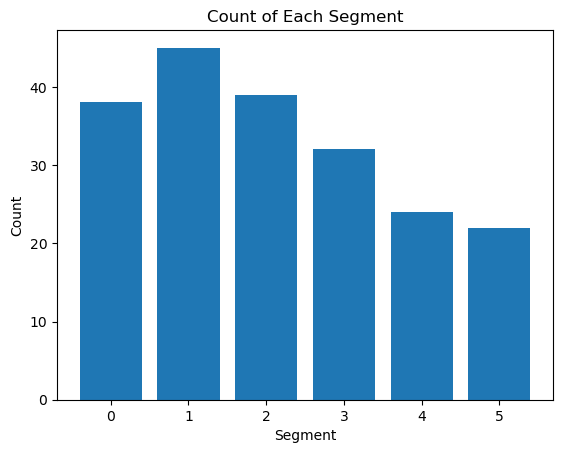

In [6]:
segment_counts = df['mean_umap_Segment'].value_counts()

plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Count of Each Segment');


While clusters 4 and 5 have significantly lower counts, they are still high enough where I feel comfortable conducting analysis on them. **Remember**, the dataset had only 200 rows in the first place which is not a realistic number of observations to conduct this analysis on. Let's dive deeper into each Segment's Age characteristics.

Examining the **Average Age** and **Age Distribution** by Segment

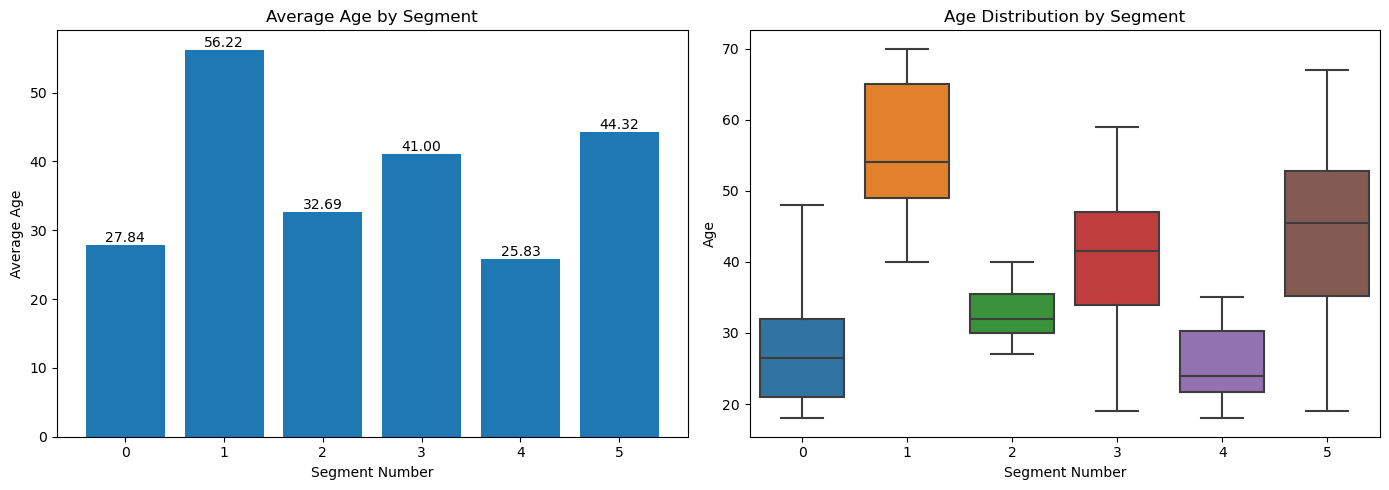

In [7]:
avg_age_by_cluster = df.groupby('mean_umap_Segment')['Age'].mean()

#Creating the figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

# Bar chart - Average age by segment
ax1.bar(avg_age_by_cluster.index, avg_age_by_cluster.values)
ax1.set_xlabel('Segment Number')
ax1.set_ylabel('Average Age')
ax1.set_title('Average Age by Segment')

# Adding data labels
for i, v in enumerate(avg_age_by_cluster.values):
    ax1.text(i, v, f'{v:.2f}', ha='center', va='bottom')
    
    
# Box Plot of Age Distribution
sns.boxplot(x='mean_umap_Segment', y='Age', data=df)
ax2.set_xlabel('Segment Number')
ax2.set_ylabel('Age')
ax2.set_title('Age Distribution by Segment')

plt.tight_layout()

We can see the average age by segment on the bar plot above. Segment 1 is significantly higher than any of the other segments. Segments 0 and 4 have the lowest average ages where both are in the 20s. If we examine the box plot to the right, we can gather more insights into the age characteristics of each column. Addressing our low-age segments (0,4), we can see that segment 4 has a smaller interquartile range. Additionally, it has smaller outliers, so we can conclude that segment 4 has more tightly grouped age values. Segment 1 has the highest range, median, and interquartile range. Segment 5 has by far the largest range of all my segments. It also has an interquartile range which stretches across a large age range. If the marketing team targets segment 5, they will have people from all different ages to cater to. Segment 2 has the most tightly packed age values as well. That could be particularly useful to the marketing team as all the segment customers fall between 25 and 45. Now I will breakdown the gender values for each segment.

Now I will breakdown the **Age Distribution by Gender**

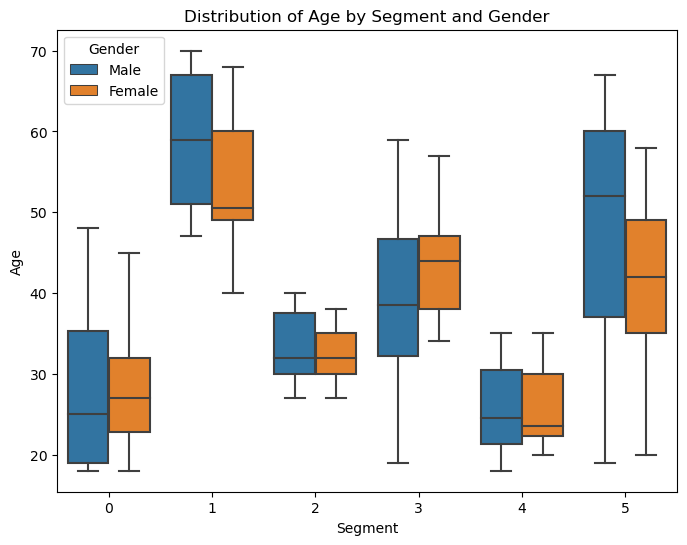

In [8]:
# Group the data by 'mean_umap_Segment' and 'Gender', and select the 'Age' column
grouped_data = df.groupby(['mean_umap_Segment', 'Gender'])['Age']

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='mean_umap_Segment', y='Age', hue='Gender')

# Set labels and title
plt.xlabel('Segment')
plt.ylabel('Age')
plt.title('Distribution of Age by Segment and Gender')


For segments 0, 2, and 4, the age distributions for each gender are similar. However, for segments 1, 3, and 5, the age distributions are significantly different. The median male age is about 10 years higher in segments 1 and 5. In segment 3, women's median age is about 10 years older as well. It will be important for the marketing team to understand the large age differences in those segments. Now that we know the distributions, let's examine the actual gender counts.

Count of Each **Gender** by Segment

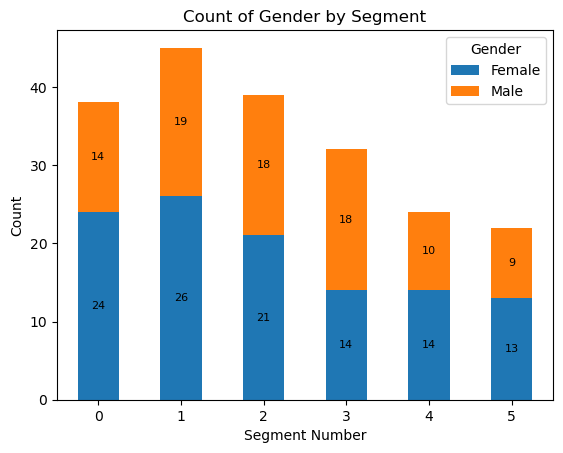

In [9]:
segment_gender_counts = df.groupby(['mean_umap_Segment', 'Gender']).size().unstack()
ax = segment_gender_counts.plot(kind='bar', stacked=True)

# Add data labels to each part of the bar plot
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)
    
plt.xlabel('Segment Number')
plt.ylabel('Count')
plt.title('Count of Gender by Segment')
plt.legend(title='Gender')
plt.xticks(rotation=0);

Every segment except segment 3 is majority male. As a result, for every segment except 3, the marketing team will need to keep in mind that the majority of the customers are men. Now, I will examine the **Annual Income** of each segment.

Average **Income** by Segment

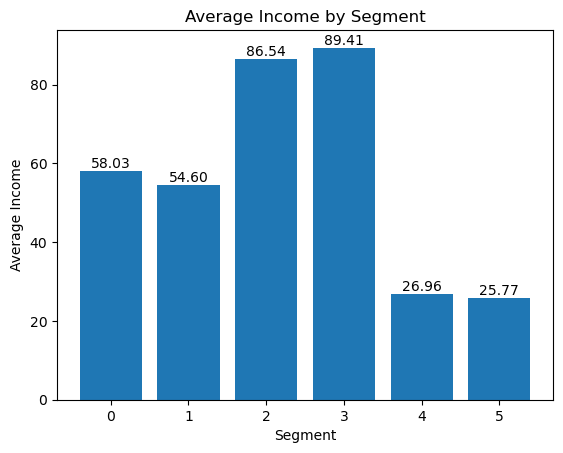

In [10]:
avg_income_segment = df.groupby('mean_umap_Segment')['Annual Income (k$)'].mean()

plt.bar(avg_income_segment.index, avg_income_segment.values)
plt.xlabel('Segment')
plt.ylabel('Average Income')
plt.title('Average Income by Segment')

for i, v in enumerate(avg_income_segment.values):
        plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

We can see three distinct levels of average income. Segments 1 and 2 have a medium sized income. Segments 2 and 3 have a large average income while segments 4 and 5 have low average incomes. Now, we'll breakdown the average incomes by gender as well to see if we can gather any insights on our segements.

Plotting **Average Income** by **Gender** and **Segment**

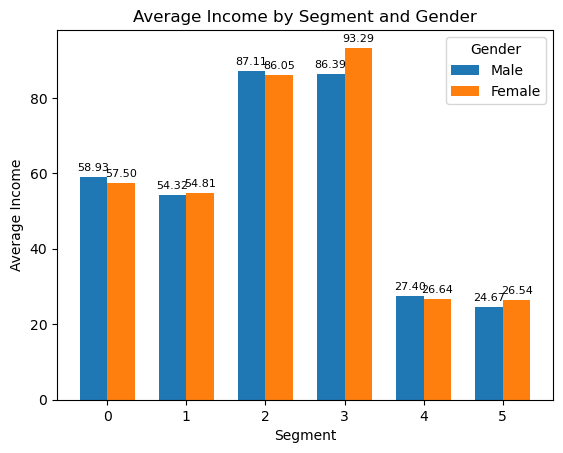

In [11]:
avg_income_gender_segment = df.groupby(['mean_umap_Segment', 'Gender'])['Annual Income (k$)'].mean().unstack()

x = np.arange(len(avg_income_gender_segment))
width = 0.35

fig, ax = plt.subplots()
male_bar = ax.bar(x - width/2, avg_income_gender_segment['Male'], width, label='Male')
female_bar = ax.bar(x + width/2, avg_income_gender_segment['Female'], width, label='Female')

ax.set_xlabel('Segment')
ax.set_ylabel('Average Income')
ax.set_title('Average Income by Segment and Gender')
ax.set_xticks(x)
ax.set_xticklabels(avg_income_gender_segment.index)
ax.legend(title='Gender')

# Add data labels to each bar
for bar in [male_bar, female_bar]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)



The average incomes for each gender is very close to each other for every segment. The largest difference in income is in segment 3 where women average roughly $7,000 more than their male counterparts. Now, I will examine the spending scores of each column in order to help understand each segment.

spending score by age, gender, and average income 

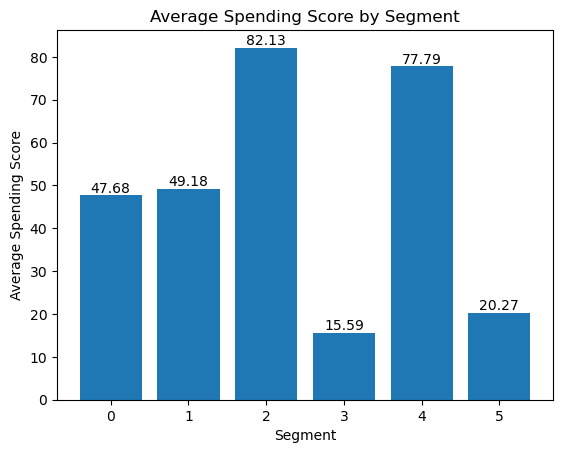

In [15]:
avg_spending_segment = df.groupby('mean_umap_Segment')['Spending Score (1-100)'].mean()


plt.bar(avg_spending_segment.index, avg_spending_segment.values)
plt.xlabel('Segment')
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score by Segment')

for i, v in enumerate(avg_spending_segment.values):
        plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

There are a few interesting findings from this plot. First, segments 2 and 3 were the segments with the highest average income, so it makes sense that segment 2 has the highest spending score. However, segment 3 has the **lowest** spending score of every segment. Similarly, segments 4 and 5 had the lowest average income of all the segments. Segment 5 has the 2nd lowest spending score which makes sense, but segment 4 has the 2nd **highest** spending score of all the segments. I will break this same plot down by gender as well below. 

Plotting **Spending Score** by **Gender** and **Segment**

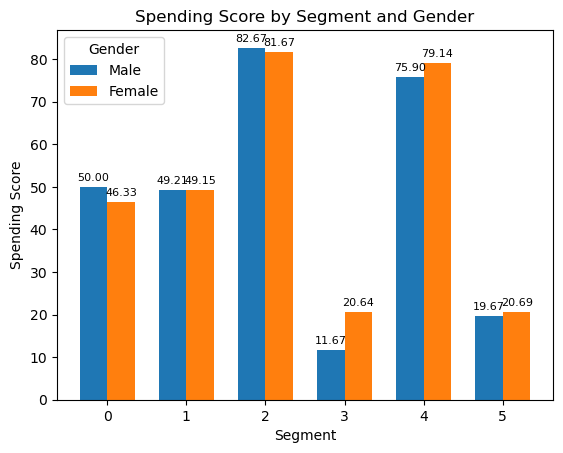

In [18]:
avg_spending_gender_segment = df.groupby(['mean_umap_Segment', 'Gender'])['Spending Score (1-100)'].mean().unstack()

x = np.arange(len(avg_spending_gender_segment))
width = 0.35

fig, ax = plt.subplots()
male_bar = ax.bar(x - width/2, avg_spending_gender_segment['Male'], width, label='Male')
female_bar = ax.bar(x + width/2, avg_spending_gender_segment['Female'], width, label='Female')

ax.set_xlabel('Segment')
ax.set_ylabel('Spending Score')
ax.set_title('Spending Score by Segment and Gender')
ax.set_xticks(x)
ax.set_xticklabels(avg_spending_gender_segment.index)
ax.legend(title='Gender')

# Add data labels to each bar
for bar in [male_bar, female_bar]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)



Just like the 'Average Income by Segment and Gender' plot, most segments have very similar spending scores across genders. Similarly to the aforementioned plot, segment 3 has the largest difference in spending by gender. Women spend nearly twice as much as men at this particular mall. It makes sense that women would have a higher spending score in segment 3 since they also average about $7,000 more than men. Finally, we can see how average income and spending score are related with color-coded data points based on segment number.

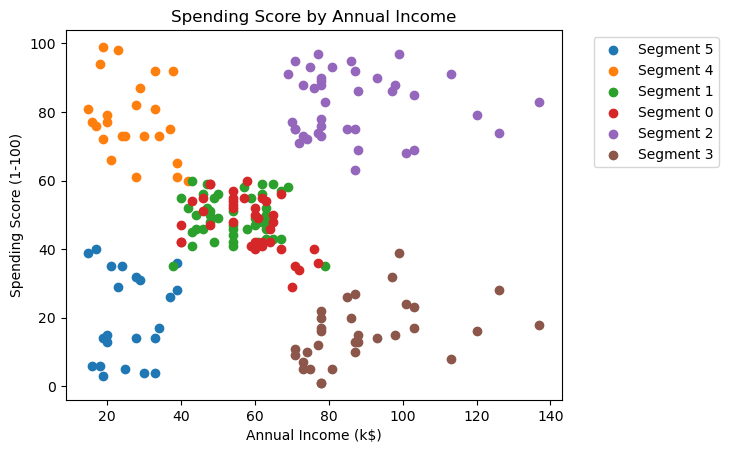

In [28]:
# Create a scatter plot for each segment
for segment in df['mean_umap_Segment'].unique():
    segment_data = df[df['mean_umap_Segment'] == segment]
    plt.scatter(segment_data['Annual Income (k$)'], segment_data['Spending Score (1-100)'],
                label=f'Segment {segment}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score by Annual Income')

# Add legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

Here we can see a nice visualization of how each cluster varies. There are 4 distinct clusters surrounding the 2 in the middle. In the summary below, I will elaborate more on the differences between each cluster.

## Summary of Clusters

| Segment 0 | Segment 1 | Segment 2 | Segment 3 | Segment 4 | Segment 5 |
|-----------|-----------|-----------|-----------|-----------|-----------|
| Average Age of 28  | Average Age of 56  | Average Age of 33 | Average Age of 41 | Average Age of 26  |Average Age of 44 |
| Age Range from 18 to about 50  | Age Range of 40-70 | Age Range from about 28-40  | Age Range of 20-60 | Age Range of 18-35 | Age Range of 20-70 |
| Women are Slightly Older  | Men are about 10 Years Older on Average  | Close Age Differential between Men and Women  | Women are Older than Men  | Men are Slightly Older  | Men are about 10 Years Older on Average  |
| Primarily Male | Majority Male | Slight Majority Male  | Slight Majority Female | Slight Majority Male  | Slight Majority Male  |
| Medium Average Income ($58k) | Medium Average Income ($55)  | High Average Income ($87k)  | High Average Income ($89k)  | Low Average Income ($27k)  | Low Average Income ($26k)  |
|  |   |  | Women Make $7k More than Men  |  |   |
| Medium Spending Score (48)  |  Medium Spending Score (50) | High Spending Score (82)  | Low Spending Score (16)  | High Spending Score (78)  | Low Spending Score (20)  |
| Men Spend Slightly More |   | |  Females Spend about 2x as much as Men | Females Spend Slight More  |  |
